<a href="https://colab.research.google.com/github/Arona416/-_2_-/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4_%D0%91%D0%B0%D1%80%D1%80%D0%B8_%D0%90%D1%80%D0%BE%D0%BD%D0%B0_1_%D0%98%D0%90%D0%98%D0%A2_103%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

1. Реализовать задачу регрессии Решающими деревьями и Ансамблевыми методами.
2. Для решения задачи регрессии подобрать датасет самостоятельно.

Решающее дерево - это алгоритм, который принимает решения по принципу "задавайте вопросы до тех пор, пока не найдете ответ".

Ансамблевые методы - это когда мы объединяем несколько "слабых" моделей в одну "сильную".

Регрессия → предсказывает число
Arbre de décision - C'est un algorithme qui prend des décisions selon le principe "posez des questions jusqu'à ce que vous trouviez une réponse".

Les méthodes d'ensemble - C'est lorsque l'on combine plusieurs modèles "faibles" en un seul modèle "fort".

Régression → prédit un nombre.

# Пример реализации регрессии алгоритмами Деревья решений и Ансамблевыми методами

## Набор данных

Прогнозирование качества вина на основе физико-химических показателей

## Набор данных Pima Indians Diabetes представляет собой CSV-файл с 768 медицинскими наблюдениями, используемыми для бинарной классификации в машинном обучении. Его главная цель — предсказать, есть ли у пациента риск развития диабета (обозначается переменной outcome равной 1) или нет (значение 0), на основе восьми физиологических и медицинских характеристик, таких как возраст, количество беременностей, концентрация глюкозы, кровяное давление, индекс массы тела (ИМТ) и маркеры вроде инсулина. Эти данные, собранные среди женщин индейского племени Пима, служат стандартным учебным примером для тренировки и оценки алгоритмов прогнозирования медицинских рисков, но требуют внимательной предобработки, поскольку пропущенные значения закодированы нулями в числовых полях, таких как глюкоза или давление.

## 1-Import библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score


2️⃣ Загрузка датасета

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

df = pd.read_csv(url, names=columns)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3️⃣ Регрессия

📌 Регрессия → предсказывает число
🎯 Цель: предсказать уровень глюкозы (Glucose)

4️⃣ Подготовка данных
Разделение на признаки и целевую переменную

In [3]:
X = df.drop(columns=["Glucose"]).values   # Признаки
y = df["Glucose"].values                  # Целевая переменная (регрессия)

features_names = df.drop(columns=["Glucose"]).columns


5️⃣ Разделение данных (70% / 30%)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)



🌳 6️⃣ Decision Tree Regressor
Параметры дерева



In [5]:
max_depth = 14
min_samples_split = 25
max_leaf_nodes = 20


Обучение модели

In [6]:
DT_reg = DecisionTreeRegressor(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    max_leaf_nodes=max_leaf_nodes,
    random_state=42
)

DT_reg.fit(X_train, y_train)
y_predict = DT_reg.predict(X_test)


7️⃣ Кросс-валидация (Decision Tree)

In [7]:
scoring = {
    'R2 (Коэффициент детерминации)': 'r2',
    '-MSE (Средняя квадратичная ошибка)': 'neg_mean_squared_error',
    '-MAE (Средняя абсолютная ошибка)': 'neg_mean_absolute_error',
    'Max (Максимальная ошибка)': 'max_error'
}

scores = cross_validate(
    DT_reg,
    X_train,
    y_train,
    scoring=scoring,
    cv=ShuffleSplit(n_splits=5, random_state=42)
)

DF_cv_DT = pd.DataFrame(scores)
display(DF_cv_DT)

print("Средние метрики:")
print(DF_cv_DT.mean()[2:])


,fit_time,score_time,test_R2 (Коэффициент детерминации),test_-MSE (Средняя квадратичная ошибка),test_-MAE (Средняя абсолютная ошибка),test_Max (Максимальная ошибка)
0,0.012330,0.017829,0.232482,-904.051199,-20.606741,-98.441441
1,0.013403,0.010227,0.374438,-873.846596,-20.831289,-110.777778
2,0.009939,0.026459,0.210002,-1062.786923,-24.823889,-111.714286
3,0.014774,0.010288,0.275622,-801.831512,-22.090466,-90.333333
4,0.010505,0.015469,0.372898,-962.290809,-22.933593,-99.360360


Средние метрики:
test_R2 (Коэффициент детерминации)           0.293088
test_-MSE (Средняя квадратичная ошибка)   -920.961408
test_-MAE (Средняя абсолютная ошибка)      -22.257196
test_Max (Максимальная ошибка)            -102.125440
dtype: float64


📉 8️⃣ Оценка на тестовой выборке

In [8]:
print("Ошибка на тестовых данных:")
print("MSE: %.3f" % mse(y_test, y_predict))
print("RMSE: %.3f" % np.sqrt(mse(y_test, y_predict)))
print("R²: %.4f" % r2_score(y_test, y_predict))


Ошибка на тестовых данных:
MSE: 823.006
RMSE: 28.688
R²: 0.1493


🌲 9️⃣ Визуализация дерева регрессии

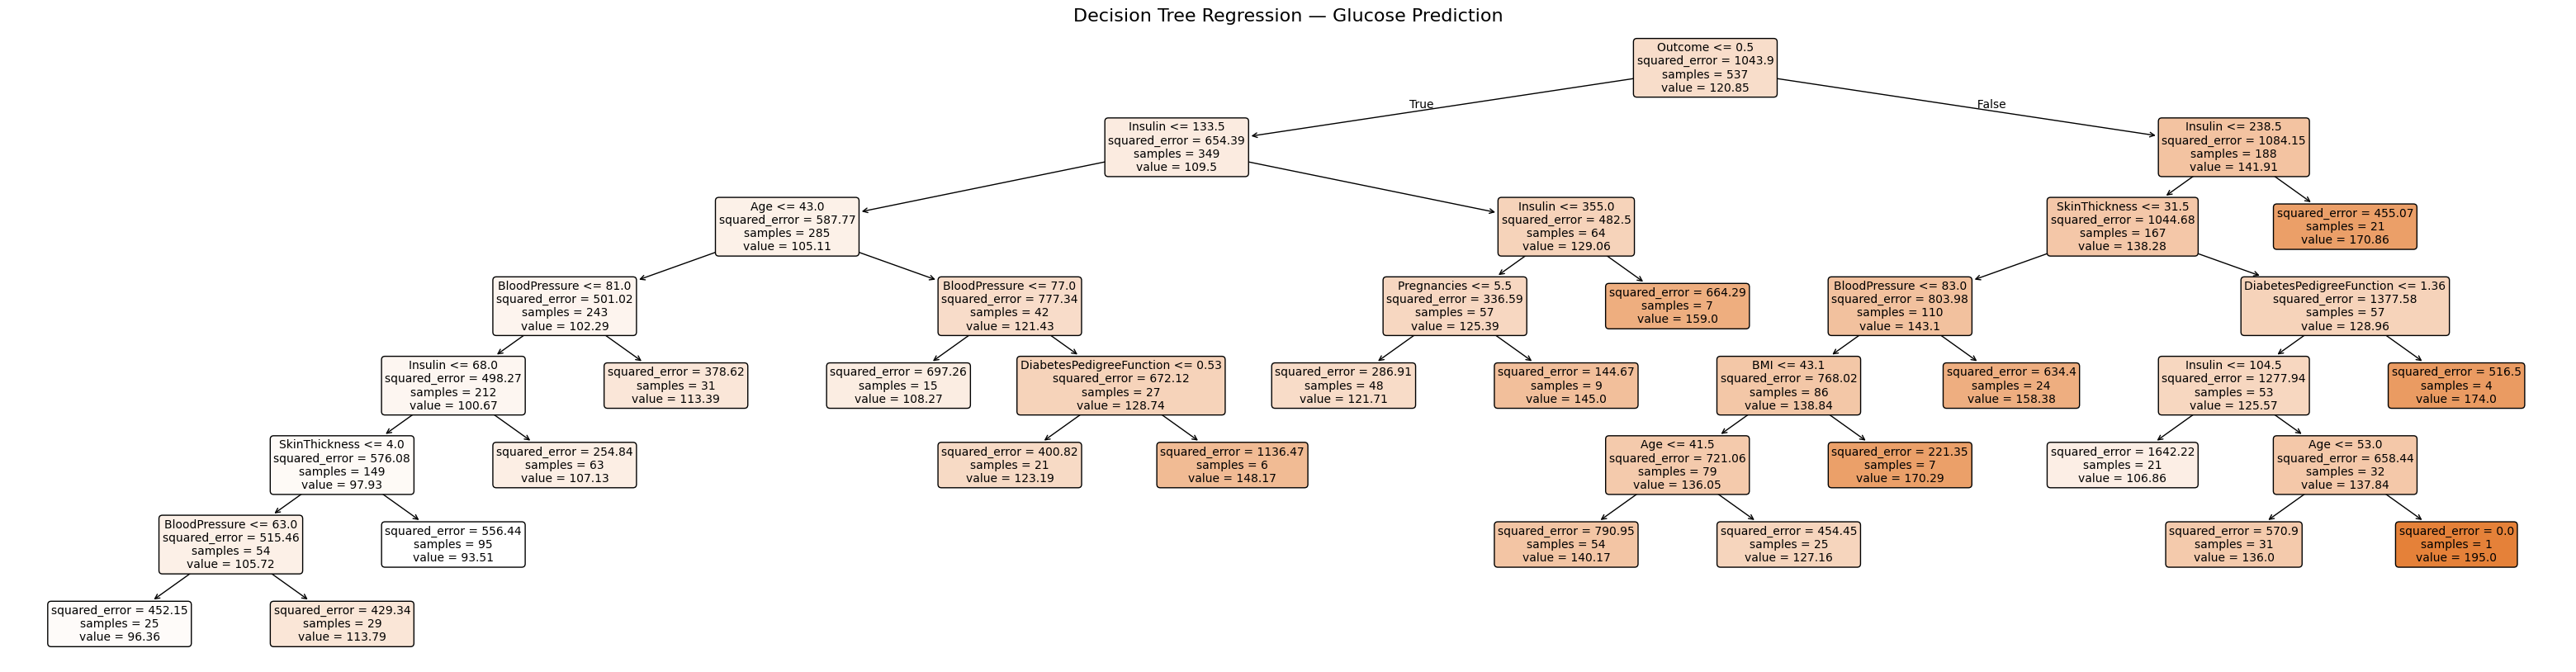

In [9]:
from sklearn import tree

plt.figure(figsize=(40,10))

tree.plot_tree(
    DT_reg,
    feature_names=features_names,
    filled=True,
    rounded=True,
    fontsize=10,
    precision=2
)

plt.title("Decision Tree Regression — Glucose Prediction", fontsize=16)
plt.show()


📊 🔟 Важность признаков (Decision Tree)

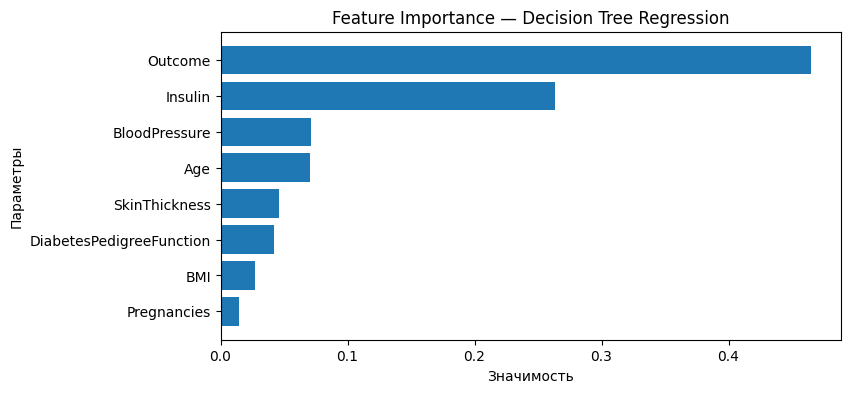

In [10]:
feature_importance = DT_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,4))
plt.barh(features_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Значимость")
plt.ylabel("Параметры")
plt.title("Feature Importance — Decision Tree Regression")
plt.show()


🌳🌳 11️⃣ Random Forest Regressor

In [11]:
n_estimators = 150
max_depth = 10


Etudes

In [12]:
RF_reg = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    oob_score=True,
    random_state=42
)

RF_reg.fit(X_train, y_train)
y_predict = RF_reg.predict(X_test)


🔁 12️⃣ Кросс-валидация (Random Forest)

In [13]:
scores = cross_validate(
    RF_reg,
    X_train,
    y_train,
    scoring=scoring,
    cv=ShuffleSplit(n_splits=5, random_state=42)
)

DF_cv_RF = pd.DataFrame(scores)
display(DF_cv_RF)

print("Средние метрики:")
print(DF_cv_RF.mean()[2:])
print("OOB score:", RF_reg.oob_score_)


,fit_time,score_time,test_R2 (Коэффициент детерминации),test_-MSE (Средняя квадратичная ошибка),test_-MAE (Средняя абсолютная ошибка),test_Max (Максимальная ошибка)
0,0.675864,0.025633,0.348706,-767.152503,-18.822068,-96.846958
1,0.824719,0.025950,0.267161,-1023.702022,-22.091452,-139.259506
2,0.852796,0.029909,0.304358,-935.849709,-23.699588,-104.723076
3,0.728684,0.015708,0.437567,-622.570790,-20.038515,-62.132089
4,0.554484,0.015722,0.488488,-784.916920,-21.187901,-93.910459


Средние метрики:
test_R2 (Коэффициент детерминации)           0.369256
test_-MSE (Средняя квадратичная ошибка)   -826.838389
test_-MAE (Средняя абсолютная ошибка)      -21.167905
test_Max (Максимальная ошибка)             -99.374418
dtype: float64
OOB score: 0.2620860037085184


📉 13️⃣ Ошибка Random Forest

In [14]:
print("MSE: %.3f" % mse(y_test, y_predict))
print("RMSE: %.3f" % np.sqrt(mse(y_test, y_predict)))
print("R²: %.4f" % r2_score(y_test, y_predict))


MSE: 733.936
RMSE: 27.091
R²: 0.2414


📊 14️⃣ Важность признаков (Random Forest)

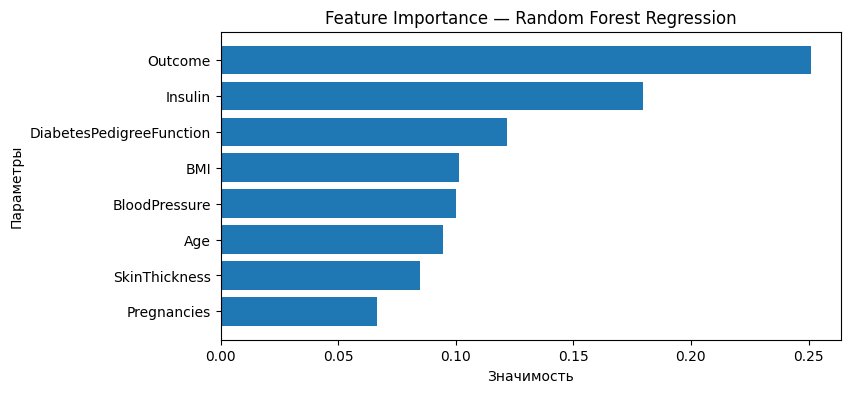

In [15]:
feature_importance = RF_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,4))
plt.barh(features_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Значимость")
plt.ylabel("Параметры")
plt.title("Feature Importance — Random Forest Regression")
plt.show()


🚀 15️⃣ Boosting — XGBoost Regressor

In [16]:
import xgboost as xg


In [17]:
model = xg.XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)


🔁 16️⃣ Кросс-валидация (XGBoost)

In [18]:
scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=ShuffleSplit(n_splits=5, random_state=42)
)

DF_cv_xgb = pd.DataFrame(scores)
display(DF_cv_xgb)

print("Средние метрики:")
print(DF_cv_xgb.mean()[2:])


,fit_time,score_time,test_R2 (Коэффициент детерминации),test_-MSE (Средняя квадратичная ошибка),test_-MAE (Средняя абсолютная ошибка),test_Max (Максимальная ошибка)
0,0.093222,0.004305,0.342677,-774.253540,-19.870958,-95.157928
1,0.094502,0.004323,0.237493,-1065.145874,-22.593924,-137.182205
2,0.096148,0.004272,0.231144,-1034.343872,-24.898523,-94.923775
3,0.095742,0.004530,0.413556,-649.148743,-19.935801,-66.329124
4,0.084868,0.004290,0.358689,-984.095215,-24.595629,-95.212784


Средние метрики:
test_R2 (Коэффициент детерминации)           0.316712
test_-MSE (Средняя квадратичная ошибка)   -901.397449
test_-MAE (Средняя абсолютная ошибка)      -22.378967
test_Max (Максимальная ошибка)             -97.761163
dtype: float64


📉 17️⃣ Ошибка XGBoost

In [19]:
print("MSE: %.3f" % mse(y_test, y_predict))
print("RMSE: %.3f" % np.sqrt(mse(y_test, y_predict)))
print("R²: %.4f" % r2_score(y_test, y_predict))


MSE: 826.195
RMSE: 28.744
R²: 0.1460
